# Customer Satisfaction Analysis with Python

## 1. Introduction
This notebook provides an analysis of customer satisfaction using Python libraries such as pandas, matplotlib, and seaborn. We will explore, manipulate, and visualize the dataset to gain insights into customer behaviors and satisfaction metrics.

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure plotting inline
%matplotlib inline


In [4]:
# Load the dataset
data = pd.read_csv('E-commerce_NPA_Dataset.csv')

# Display the first few rows of the dataset
data.head()


,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


## 2. Data Exploration
### 2.1 Checking for Missing Values

In [5]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


CustomerID                0
Age                       0
Gender                    0
PurchaseAmount            0
PurchaseFrequency         0
ProductQualityRating      0
DeliveryTimeRating        0
CustomerServiceRating     0
WebsiteEaseOfUseRating    0
ReturnRate                0
DiscountUsage             0
LoyaltyProgramMember      0
dtype: int64

##### Missing Values:
* There are no missing values in the dataset, indicating that the data is complete.


### 2.2 Summary Statistics

In [6]:
# Generating summary statistics for numerical columns
summary_stats = data.describe()
summary_stats


,CustomerID,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,250.500000,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,144.481833,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,1.000000,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,125.750000,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,250.500000,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,375.250000,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,500.000000,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


##### Summary Statistics:

* The average purchase amount is $1065, with a wide variation.
 
* Customers make an average of 14 purchases, with some making up to 29 purchases.
 
* Ratings for product quality, delivery time, customer service, and website ease of use are centered around 3 on a scale from 1 (poor) to 5 (excellent).

* The average return rate is 25%, with a maximum of 50%.


* Discount usage is highly variable, with an average of $251 in discounts used.


* Satisfaction Score Distribution: The SatisfactionScore (mean of all ratings) has a broad distribution, with most scores clustered around 3, indicating moderate satisfaction.


### 2.3 Categorical Data Overview

In [7]:
# Value counts for Gender and LoyaltyProgramMember
categorical_distribution = data[['Gender', 'LoyaltyProgramMember']].value_counts()
categorical_distribution


Gender  LoyaltyProgramMember
Female  Yes                     139
        No                      127
Male    Yes                     122
        No                      112
Name: count, dtype: int64


##### Age Group and Gender Segmentation:

* Younger customers (18-29) tend to have slightly higher satisfaction scores, especially among females.

* Older males (60-69) tend to have lower satisfaction scores compared to other groups.

* Females aged 30-39 and 50-59 show moderate satisfaction, while males in the same age groups also show more varied satisfaction levels.

## 3. Feature Engineering: Creating Satisfaction Score
We will create a new feature, SatisfactionScore, as the mean of various customer rating columns.

In [8]:
# Creating a new feature 'SatisfactionScore'
data['SatisfactionScore'] = data[['ProductQualityRating', 'DeliveryTimeRating',
                                  'CustomerServiceRating', 'WebsiteEaseOfUseRating']].mean(axis=1)

# Display the first few rows to verify the new column
data[['CustomerID', 'SatisfactionScore']].head()


,CustomerID,SatisfactionScore
0,1,2.75
1,2,4.50
2,3,3.25
3,4,3.25
4,5,3.25


## 4. Data Visualization
### 4.1 Distribution of Satisfaction Score

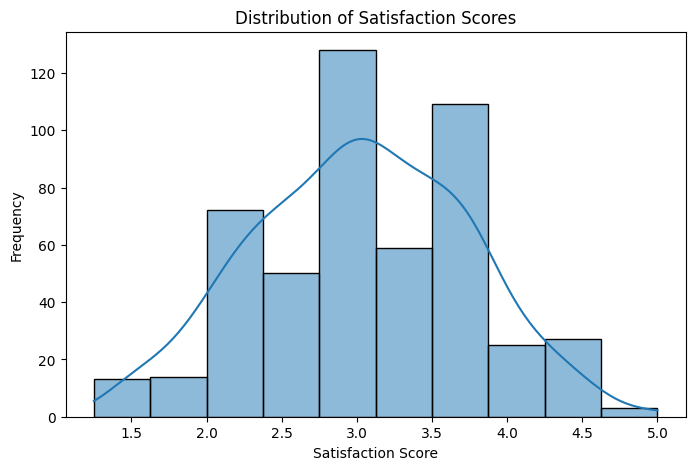

In [9]:
# Plotting the distribution of SatisfactionScore
plt.figure(figsize=(8, 5))
sns.histplot(data['SatisfactionScore'], kde=True, bins=10)
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()


### Explanation:
The **SatisfactionScore** is the average of all rating metrics (Product Quality, Delivery Time, Customer Service, Website Ease of Use).  
The distribution is centered around a score of 3, which indicates that most customers gave moderate satisfaction ratings.  
There is a spread of satisfaction scores from low (around 1) to high (around 5), showing that while most customers are moderately satisfied, there are outliers who are either highly dissatisfied or highly satisfied.

### 4.2 Distributions of Key Numeric Variables

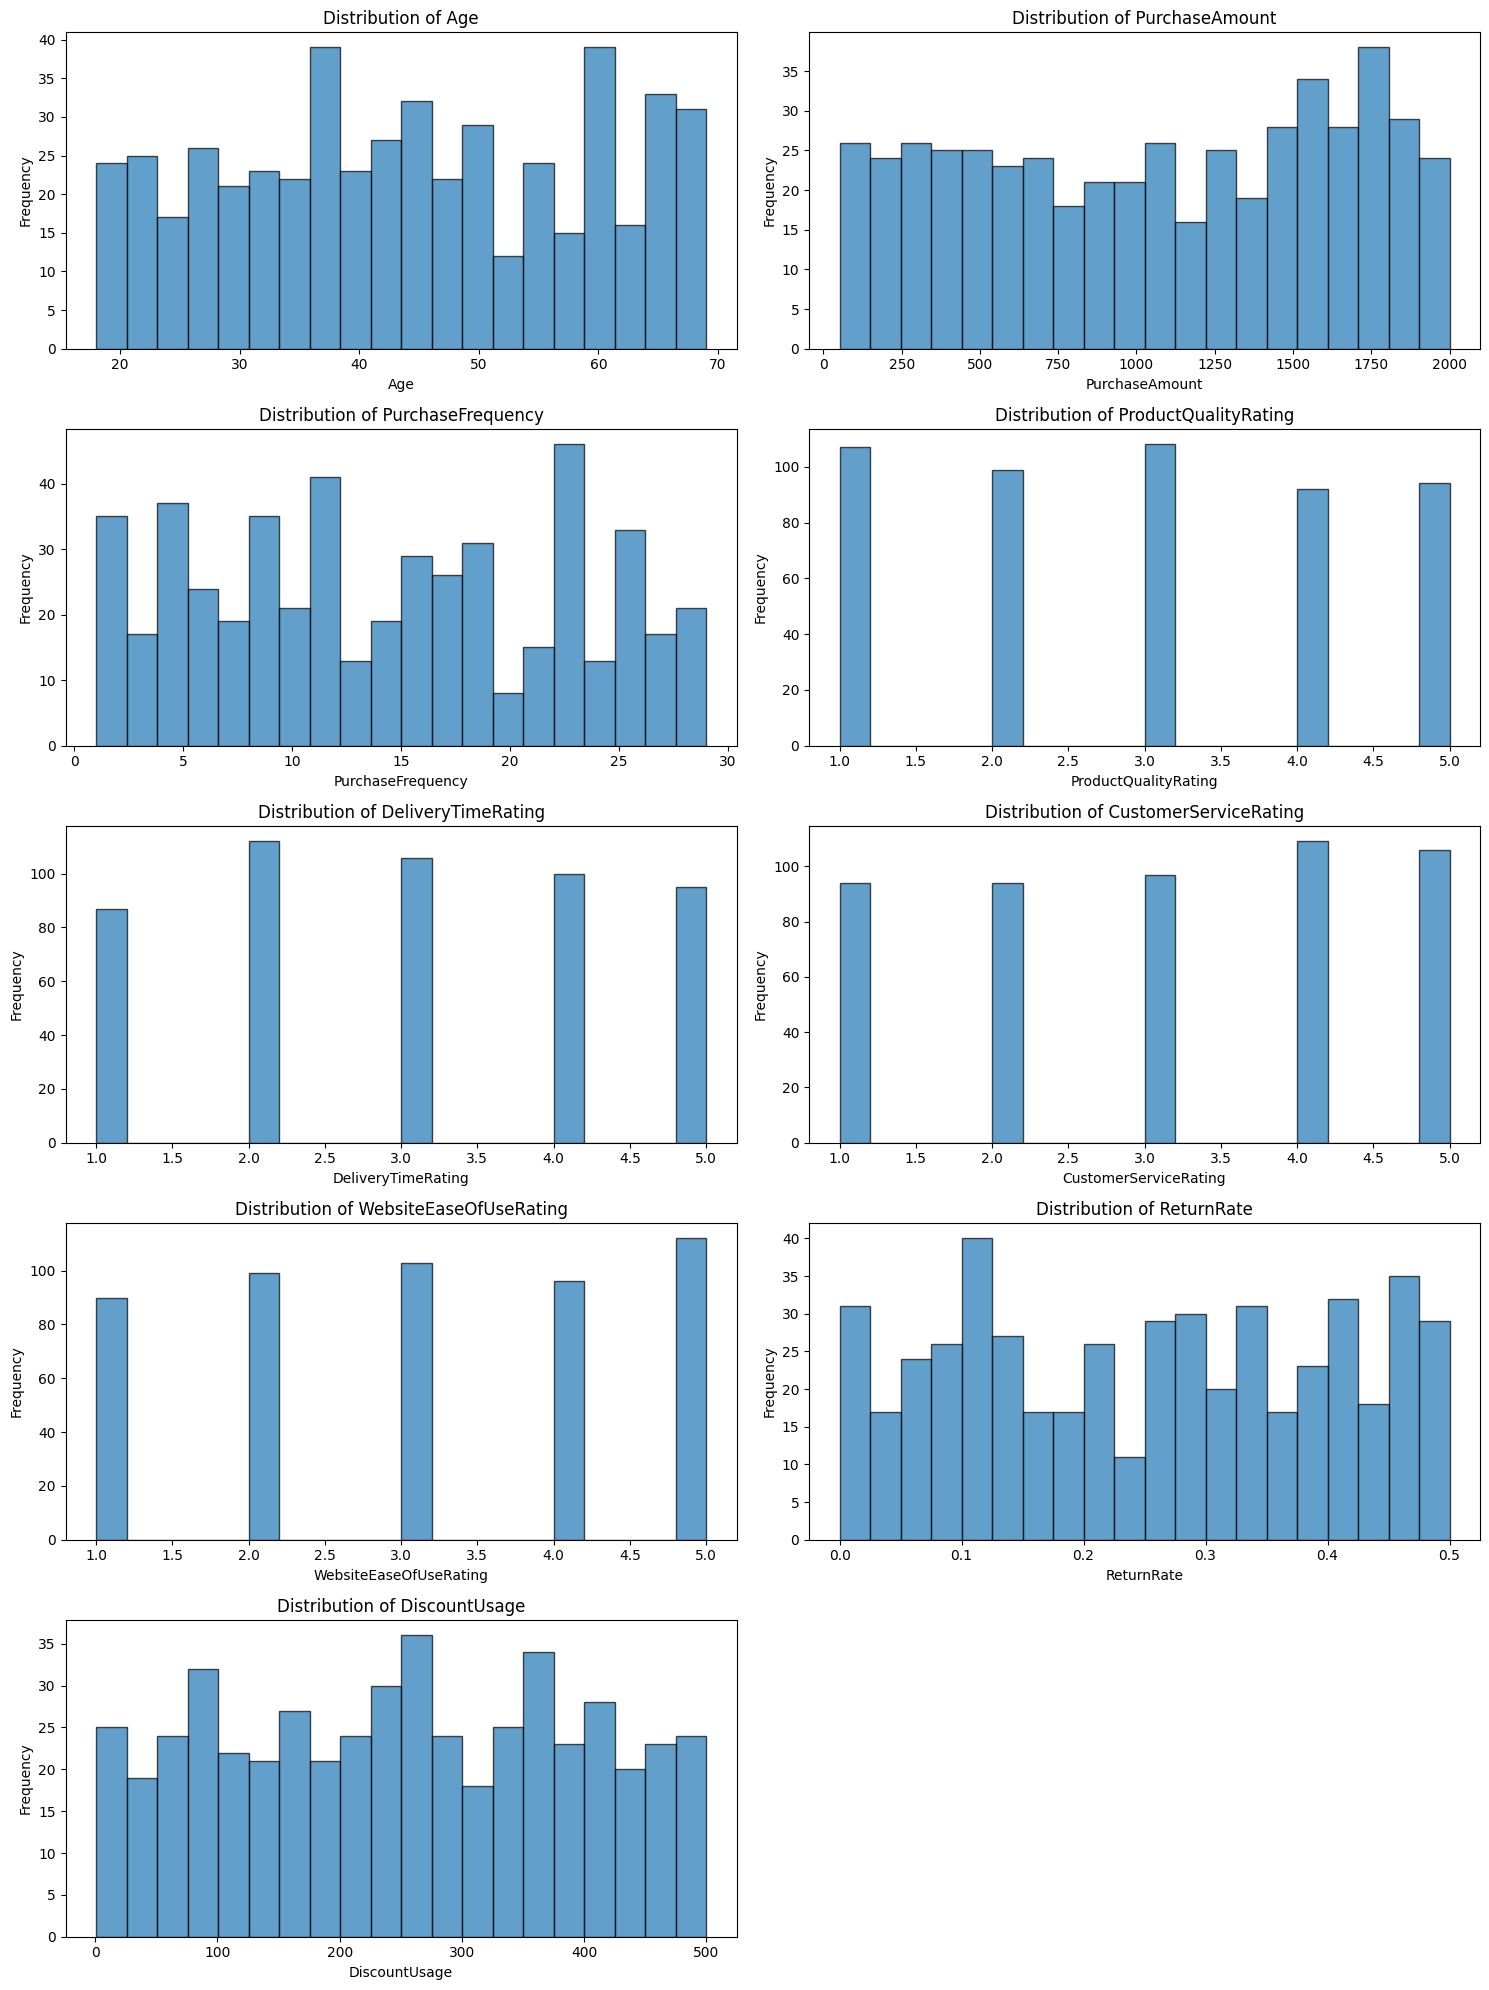

In [10]:
# List of numeric columns to visualize
numeric_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating',
                'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating',
                'ReturnRate', 'DiscountUsage']

# Plotting distributions
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    plt.hist(data[col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Explanation**:  
- **Age**: The distribution shows a fairly even spread across different age groups, with slight peaks around the 30s and 60s.  
- **Purchase Amount**: This distribution is right-skewed, indicating that while some customers make large purchases, most spend less than $1000.  
- **Purchase Frequency**: The number of purchases is variable, with peaks around 10 and 20 purchases. Some customers are highly engaged, making a high number of purchases.  
- **Product Quality, Delivery Time, Customer Service, Website Ease of Use**: These rating distributions are centered around 3, suggesting moderate satisfaction across all rating aspects.  
- **Return Rate**: There are peaks around 0.1 and 0.4, indicating that certain groups of customers are more likely to return products.  
- **Discount Usage**: Discount usage is evenly distributed, with no particular trend, suggesting that customers vary widely in their use of discounts.


## 5. Segmentation Analysis
### 5.1 Segmentation by Age Group and Gender

In [11]:
# Create age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and Gender and calculate mean ratings
mean_ratings_age_gender = data.groupby(['AgeGroup', 'Gender'])[['SatisfactionScore']].mean().reset_index()
mean_ratings_age_gender


/tmp/ipykernel_1066/535036158.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings_age_gender = data.groupby(['AgeGroup', 'Gender'])[['SatisfactionScore']].mean().reset_index()


,AgeGroup,Gender,SatisfactionScore
0,18-29,Female,3.087719
1,18-29,Male,3.155556
2,30-39,Female,2.942982
3,30-39,Male,2.940000
4,40-49,Female,3.031818
5,40-49,Male,3.077381
6,50-59,Female,3.020270
7,50-59,Male,3.026042
8,60-69,Female,3.054167
9,60-69,Male,2.933673


### 5.2 Visualizing Age and Gender Satisfaction

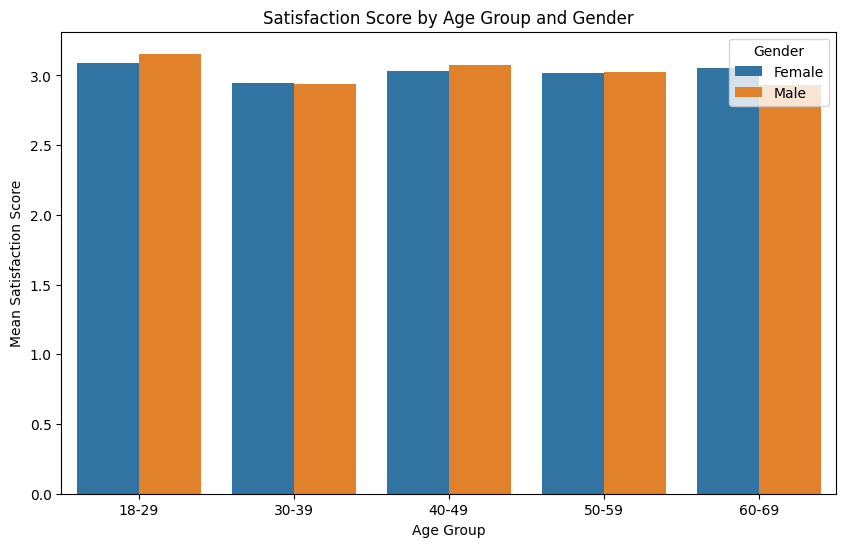

In [12]:
# Plotting satisfaction by age group and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='SatisfactionScore', hue='Gender', data=mean_ratings_age_gender)
plt.title('Satisfaction Score by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Mean Satisfaction Score')
plt.show()


**Explanation**:  
- Younger customers (18-29) generally report slightly higher satisfaction, particularly females in this group.  
- Older males (60-69) tend to report lower satisfaction scores.  
- Females aged 30-39 and 50-59 tend to show moderate satisfaction, while males in the same age groups exhibit more variability in their satisfaction ratings.  
This graph helps us understand that satisfaction levels vary across different demographics, with gender and age playing a significant role in customer satisfaction.


## 6. Loyalty Program Analysis
### 6.1 Satisfaction Ratings by Loyalty Program Membership

In [13]:
# Group by Loyalty Program Member and calculate mean satisfaction scores
mean_ratings_loyalty = data.groupby('LoyaltyProgramMember')[['ProductQualityRating', 'DeliveryTimeRating', 
                                                             'CustomerServiceRating', 'WebsiteEaseOfUseRating', 
                                                             'ReturnRate', 'DiscountUsage']].mean().reset_index()
mean_ratings_loyalty


,LoyaltyProgramMember,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
0,No,2.920502,2.916318,2.987448,3.108787,0.251883,241.426710
1,Yes,2.946360,3.091954,3.160920,3.057471,0.252644,260.113108


### 6.2 Visualizing Loyalty Program Impact

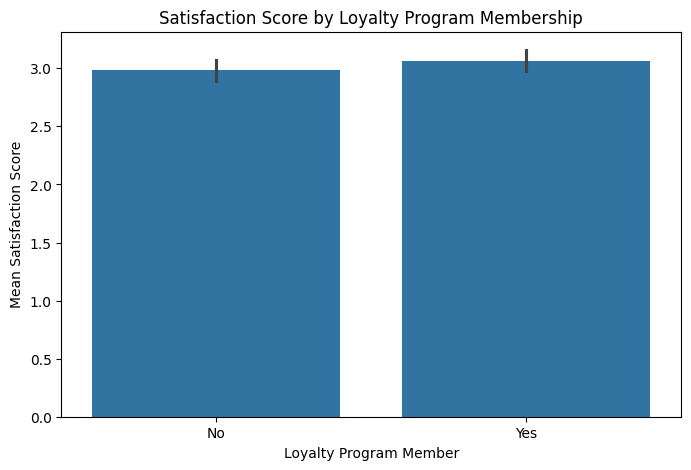

In [14]:
# Plotting satisfaction by loyalty program membership
plt.figure(figsize=(8, 5))
sns.barplot(x='LoyaltyProgramMember', y='SatisfactionScore', data=data)
plt.title('Satisfaction Score by Loyalty Program Membership')
plt.xlabel('Loyalty Program Member')
plt.ylabel('Mean Satisfaction Score')
plt.show()


##### Loyalty Program Membership:

* Loyalty program members generally have slightly higher satisfaction scores compared to non-members, but the difference is minimal.
Members and non-members are similar in terms of return rate and discount usage.


## 7. Net Promoter Score (NPS)
We will calculate the Net Promoter Score based on the CustomerServiceRating.

In [15]:
# Define NPS categories
data['NPS_Category'] = pd.cut(data['CustomerServiceRating'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'], right=False)

# Calculate NPS
nps_counts = data['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_counts['Promoters'] - nps_counts['Detractors']
nps_counts, nps_score


(NPS_Category
 Detractors    100.0
 Passives        0.0
 Promoters       0.0
 Name: proportion, dtype: float64,
 -100.0)

##### Net Promoter Score (NPS):

100% of customers fall into the Detractors category, leading to an NPS score of -100.
There are no Promoters or Passives, which highlights significant dissatisfaction among customers, especially in terms of customer service.


## 8. Root Cause Analysis for Low Ratings
### 8.1 Identifying Customers with Low Ratings

In [16]:
# Define threshold for low ratings
low_rating_threshold = 2

# Subsets for low ratings
low_product_quality = data[data['ProductQualityRating'] <= low_rating_threshold]
low_delivery_time = data[data['DeliveryTimeRating'] <= low_rating_threshold]
low_customer_service = data[data['CustomerServiceRating'] <= low_rating_threshold]
low_website_ease_of_use = data[data['WebsiteEaseOfUseRating'] <= low_rating_threshold]


### 8.2 Visualization of Low Ratings by Age

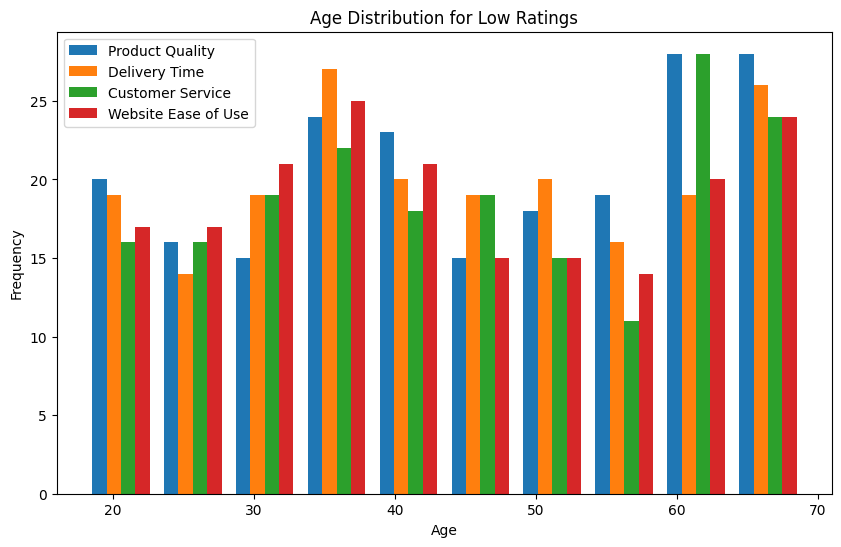

In [17]:
# Plotting age distribution for low ratings across multiple factors
plt.figure(figsize=(10, 6))
plt.hist([low_product_quality['Age'], low_delivery_time['Age'], 
          low_customer_service['Age'], low_website_ease_of_use['Age']], bins=10, 
         label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Age Distribution for Low Ratings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 9. Conclusion
This analysis provides insights into customer satisfaction, segmented by demographics and behavioral factors. The low Net Promoter Score suggests significant room for improvement, especially in customer service and product quality. Further steps could include targeted interventions to improve these areas and track the subsequent changes in customer satisfaction.